In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import pyspark
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
dfSub = pd.read_csv("C:/Users/MY COMPUTER/Documents/OneCampus files/Final Project/crime_data_Proj1.csv")


In [6]:
# Size of the data
dfSub.shape

(2278726, 23)

In [6]:
dfSub.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [6]:
dfSub.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
 23  month  

In [7]:
# using parse module to parse date and time
# datetime module will be used to instantiate date objects
from dateutil.parser import parse
from datetime import datetime
tCol = dfSub.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<5:
        period = 'Evening'
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
    
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList)), (len(monthList)), (len(periodList))

dfSub['month'] = monthList
dfSub['day'] = dayList
dfSub['period'] = periodList
dfSub.head()     
    


2278726


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day,period
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",Jul,Sat,Unknown
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",Jul,Tue,Unknown
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",Apr,Fri,Unknown
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",Jul,Mon,Unknown
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",Jul,Sun,Unknown


In [10]:
# Check the distribution
dfSub.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2275848.0,1.139378e+06,6.578214e+05,0.000000,5.696918e+05,1.139396e+06,1.709070e+06,2.278725e+06
ID,2275848.0,6.876376e+06,3.417346e+06,637.000000,3.712173e+06,6.879155e+06,9.875953e+06,1.278199e+07
Beat,2275848.0,1.186369e+03,7.026317e+02,111.000000,6.210000e+02,1.034000e+03,1.731000e+03,2.535000e+03
District,2275848.0,1.128957e+01,6.946043e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,2275848.0,2.272328e+01,1.383019e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,2275848.0,3.753028e+01,2.153039e+01,0.000000,2.300000e+01,3.200000e+01,5.700000e+01,7.700000e+01
X Coordinate,2275848.0,1.164566e+06,1.673507e+04,0.000000,1.152945e+06,1.166056e+06,1.176364e+06,1.205119e+06
Y Coordinate,2275848.0,1.885740e+06,3.208918e+04,0.000000,1.859046e+06,1.890659e+06,1.909214e+06,1.951622e+06
Year,2275848.0,2.009628e+03,6.016562e+00,2001.000000,2.004000e+03,2.009000e+03,2.014000e+03,2.022000e+03
Latitude,2275848.0,4.184207e+01,8.827838e-02,36.619446,4.176865e+01,4.185575e+01,4.190665e+01,4.202291e+01


In [ ]:
There is need for standardization (the stdv across the features are above 1) and 
rescaling (range of values of min and max across the features varies )

In [4]:
# Check Missing values
dfSub.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

# Treat Missing Values

In [11]:
# Treating Missing values for Categorical variables
dfSub = dfSub.dropna(subset=['Case Number'])

dfSub = dfSub.dropna(subset=['Location Description'])

In [12]:
# Treating Missing values for Numerical variables
# Pading method is used because the values doesn't change much.

# District
dfSub["District"].fillna(method = 'pad', inplace = True) 

# Ward
dfSub["Ward"].fillna(method = 'pad', inplace = True)

# Community Area
dfSub["Community Area"].fillna(method = 'pad', inplace = True)

# X Coordinate
dfSub["X Coordinate"].fillna(method = 'pad', inplace = True)

# Y Coordinate
dfSub["Y Coordinate"].fillna(method = 'pad', inplace = True)

# Latitude
dfSub["Latitude"].fillna(method = 'pad', inplace = True)

# Longitude
dfSub["Longitude"].fillna(method = 'pad', inplace = True)

# Location
dfSub["Location"].fillna(method = 'pad', inplace = True)


In [7]:
dfSub.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
month                   0
day                     0
period                  0
dtype: int64

In [13]:
# Duplication
# Sorting by ID
dfSub.sort_values("ID", inplace = True)

# dropping all duplicate values but first row will remain
dfSub.drop_duplicates(subset ="ID", inplace = True)

In [15]:
# Removing outliers
We will not check for outliers because there is no concept of outliers in categorical variables.

# Convert Categorical Variables to Numeric

In [ ]:
# Using Dummy Variable Encoding 
# Arrest
Arrest_encode = dfSub.copy()
Arrest_encoded = pd.get_dummies(Arrest_encode, columns=['Arrest'], prefix=['Arrest'])
dfSub = Arrest_encoded.copy()


In [9]:
#Domestic
Domestic_encode = dfSub.copy()
Domestic_encoded = pd.get_dummies(Domestic_encode, columns=['Domestic'], prefix=['Domestic'])
dfSub = Domestic_encoded.copy()

In [10]:
#Primary Type
PrimaryType = dfSub.copy()
PrimaryType_encoded = pd.get_dummies(PrimaryType, columns=['Primary Type'], prefix=['Primary Type'])
dfSub = PrimaryType_encoded.copy()

In [19]:
dfSub.head(15)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Description,Location Description,Beat,District,...,Primary Type_OTHER OFFENSE,Primary Type_PROSTITUTION,Primary Type_PUBLIC INDECENCY,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_RITUALISM,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION
1832276,1832276,637,G005960,01/06/2001 10:35:00 AM,014XX N HARDING ST,0110,FIRST DEGREE MURDER,STREET,2535,25.0,...,0,0,0,0,0,0,0,0,0,0
914628,914628,638,G008793,01/05/2001 04:22:00 PM,016XX W 80 ST,0110,FIRST DEGREE MURDER,STREET,611,6.0,...,0,0,0,0,0,0,0,0,0,0
537867,537867,646,G019133,01/10/2001 01:59:00 AM,037XX W ARGYLE ST,0110,FIRST DEGREE MURDER,STREET,1712,17.0,...,0,0,0,0,0,0,0,0,0,0
570795,570795,647,G021128,01/10/2001 08:00:00 PM,071XX S BENNETT AVE,0110,FIRST DEGREE MURDER,STREET,333,3.0,...,0,0,0,0,0,0,0,0,0,0
951439,951439,653,G023498,01/12/2001 02:30:00 PM,089XX S COTTAGE GROVE AVE,0110,FIRST DEGREE MURDER,RETAIL STORE,633,6.0,...,0,0,0,0,0,0,0,0,0,0
2072277,2072277,657,G030711,01/15/2001 09:59:00 AM,038XX W 25 ST,0110,FIRST DEGREE MURDER,STREET,1013,10.0,...,0,0,0,0,0,0,0,0,0,0
512476,512476,659,G032407,01/16/2001 01:17:00 AM,006XX N CICERO AVE,0110,FIRST DEGREE MURDER,RESTAURANT,1111,11.0,...,0,0,0,0,0,0,0,0,0,0
1204948,1204948,660,G032650,01/16/2001 09:00:00 AM,003XX W 81 ST,0110,FIRST DEGREE MURDER,STREET,623,6.0,...,0,0,0,0,0,0,0,0,0,0
2122083,2122083,663,G040822,01/20/2001 01:09:00 AM,010XX N CICERO AVE,0110,FIRST DEGREE MURDER,GAS STATION DRIVE/PROP.,1111,11.0,...,0,0,0,0,0,0,0,0,0,0
750057,750057,665,G042741,01/21/2001 01:09:00 AM,034XX W 25 ST,0110,FIRST DEGREE MURDER,AUTO,1024,10.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dfSub.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Description', 'Location Description', 'Beat', 'District', 'Ward',
       'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
       'Updated On', 'Latitude', 'Longitude', 'Location', 'month', 'day',
       'period', 'Arrest_False', 'Arrest_True', 'Domestic_False',
       'Domestic_True', 'Primary Type_ARSON', 'Primary Type_ASSAULT',
       'Primary Type_BATTERY', 'Primary Type_BURGLARY',
       'Primary Type_CONCEALED CARRY LICENSE VIOLATION',
       'Primary Type_CRIM SEXUAL ASSAULT', 'Primary Type_CRIMINAL DAMAGE',
       'Primary Type_CRIMINAL SEXUAL ASSAULT',
       'Primary Type_CRIMINAL TRESPASS', 'Primary Type_DECEPTIVE PRACTICE',
       'Primary Type_GAMBLING', 'Primary Type_HOMICIDE',
       'Primary Type_HUMAN TRAFFICKING',
       'Primary Type_INTERFERENCE WITH PUBLIC OFFICER',
       'Primary Type_INTIMIDATION', 'Primary Type_KIDNAPPING',
       'Primary Type_LIQUOR LAW VIOLATION', 

In [10]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275848 entries, 1832276 to 1378888
Data columns (total 62 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   Unnamed: 0                                      int64  
 1   ID                                              int64  
 2   Case Number                                     object 
 3   Date                                            object 
 4   Block                                           object 
 5   IUCR                                            object 
 6   Description                                     object 
 7   Location Description                            object 
 8   Beat                                            int64  
 9   District                                        float64
 10  Ward                                            float64
 11  Community Area                                  float64
 12  FBI Code              

# Clustering

Find Crime patterns and where they are likely to occur.

Performing K-means Clustering for District versus Primary Type_Arson.

Steps are below;


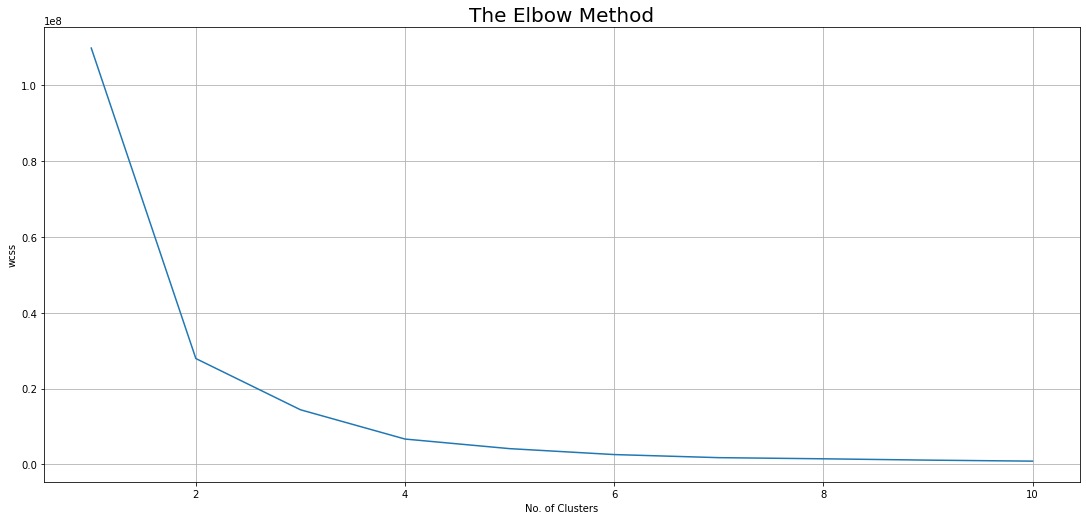

In [21]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 27]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.

In [22]:
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
Plot the scatter plot between District and Primary Type_Arson.

To make the graph more readable, assign the color pink for none crime report, 
yellow for crime occurence and blue for the centroid of the cluster:

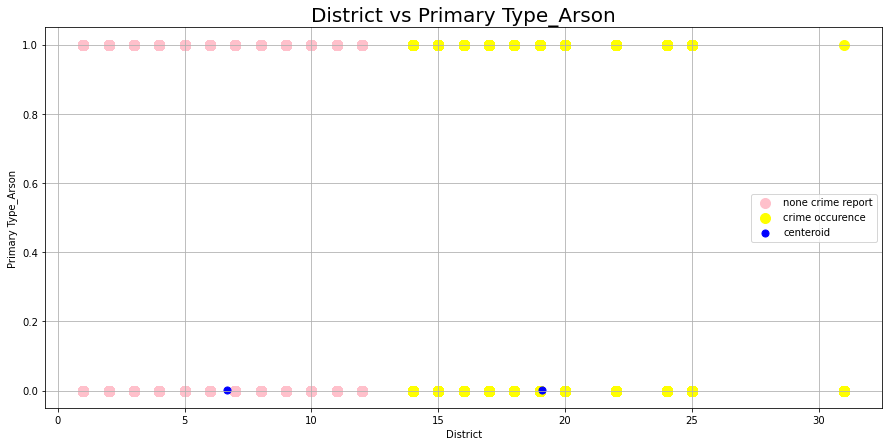

In [23]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('District vs Primary Type_Arson', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_Arson')
plt.legend()
plt.show()

In [ ]:
From the preceding cluster, we can infer that Primary Type_Arson was reported in District 19 more on average.

## Performing K-means Clustering for District versus Primary Type_Assault

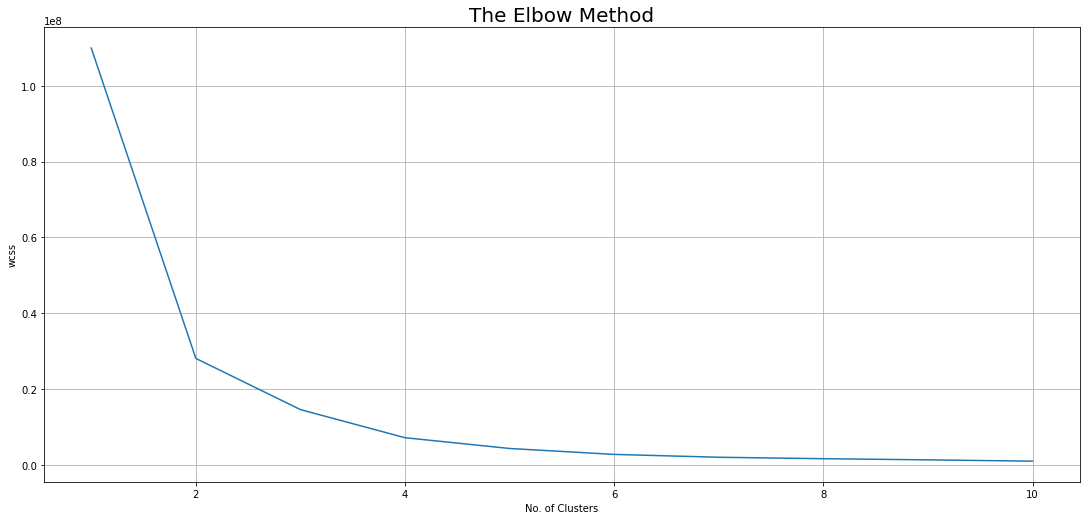

In [24]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 28]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [25]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
Plot the scatter plot between District and Primary Type_Assault.

We assign the color pink for none crime report,yellow for crime occurence and blue for the centroid of the cluster:

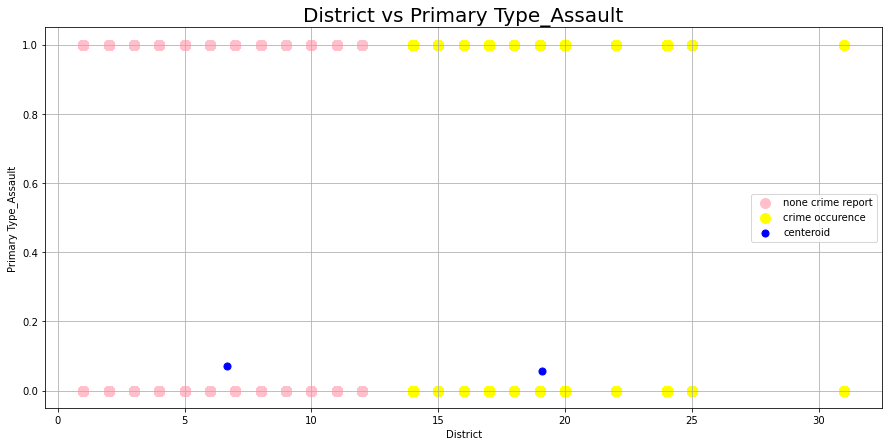

In [26]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('District vs Primary Type_Assault', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_Assault')
plt.legend()
plt.show()

In [ ]:
From the preceding cluster, we can infer that Primary Type_Assault was reported in District 19 more on average.

## Performing K-means Clustering for District versus Primary Type_Battery

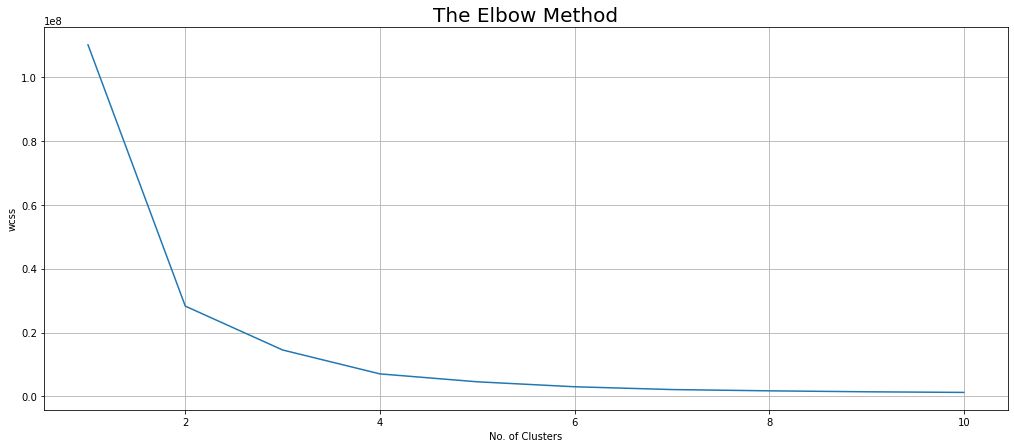

In [27]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 29]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (14, 6)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
Plot the scatter plot between District and Primary Type_Battery.

We assign the color pink for none crime report,yellow for crime occurence and blue for the centroid of the cluster:

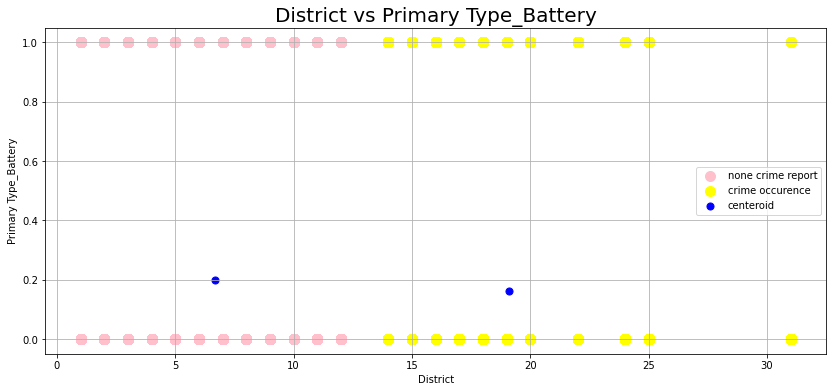

In [29]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('District vs Primary Type_Battery', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_Battery')
plt.legend()
plt.show()

In [ ]:
From the preceding cluster, we can infer that Primary Type_Battery was reported in District 19 more on average.

## Performing K-means Clustering for District versus Primary Type_Crim Sexual Assault

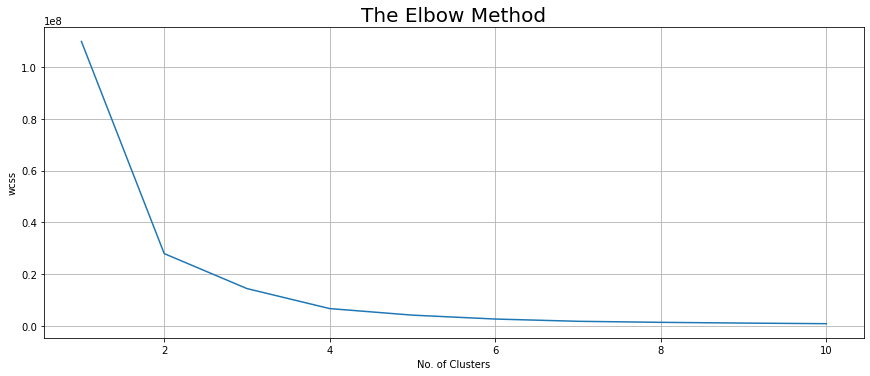

In [30]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 32]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [31]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
Plot the scatter plot between District and Primary Type_Crim Sexual Assault.

We assign the color pink for none crime report,yellow for crime occurence and blue for the centroid of the cluster:

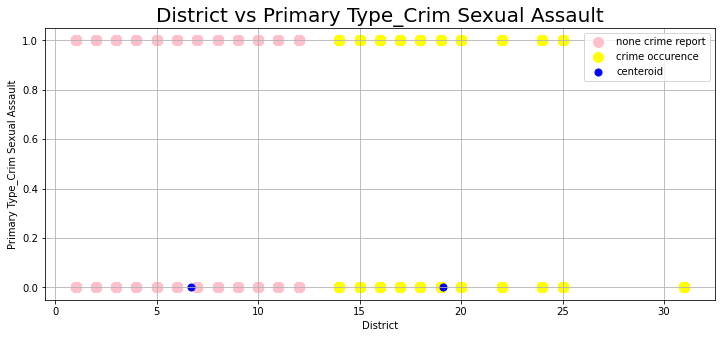

In [32]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('District vs Primary Type_Crim Sexual Assault', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_Crim Sexual Assault')
plt.legend()
plt.show()

In [ ]:
From the preceding cluster, we can infer that Primary Type_Crim Sexual Assault was reported in District 19 more on average.

## Performing K-means Clustering for District versus Primary Type_THEFT

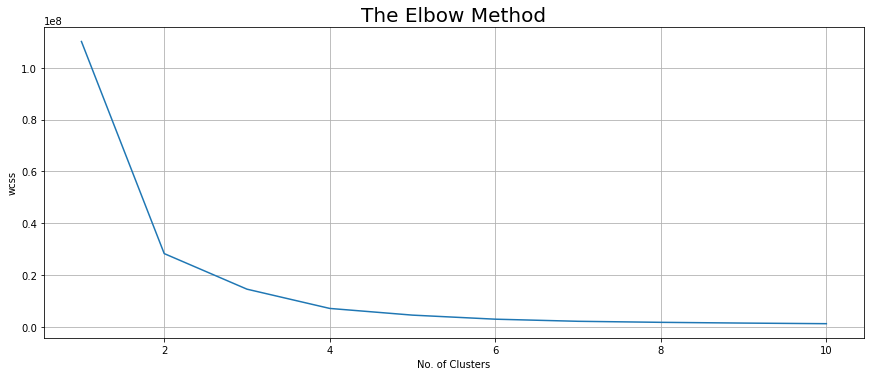

In [13]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 60]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
Plot the scatter plot between District and Primary Type_Theft.

We assign the color pink for none crime report,yellow for crime occurence and blue for the centroid of the cluster:

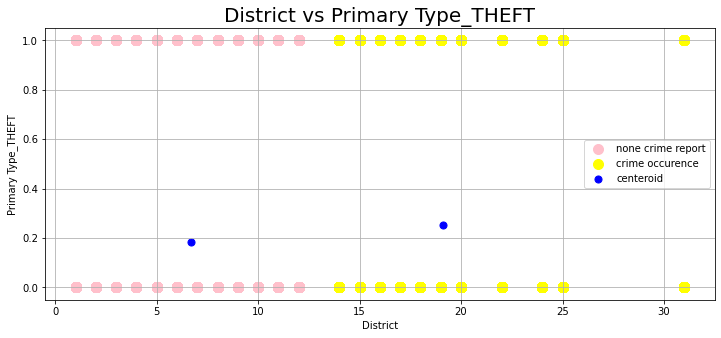

In [15]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('District vs Primary Type_THEFT', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_THEFT')
plt.legend()
plt.show()

In [ ]:
From the preceding cluster, we can infer that Primary Type_Gambling was reported in District 19 more on average.

## Performing K-means Clustering for Beat versus Primary Type


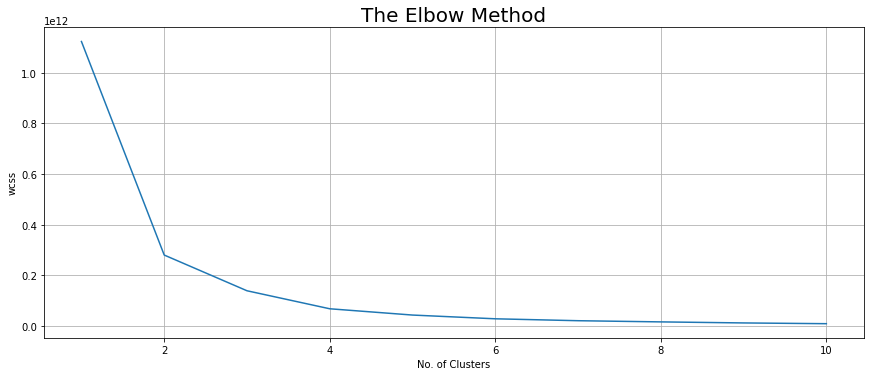

In [11]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [8, 27]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
Plot the scatter plot between Beat and Primary Type.

We assign the color pink for none crime report,yellow for crime occurence and blue for the centroid of the cluster:

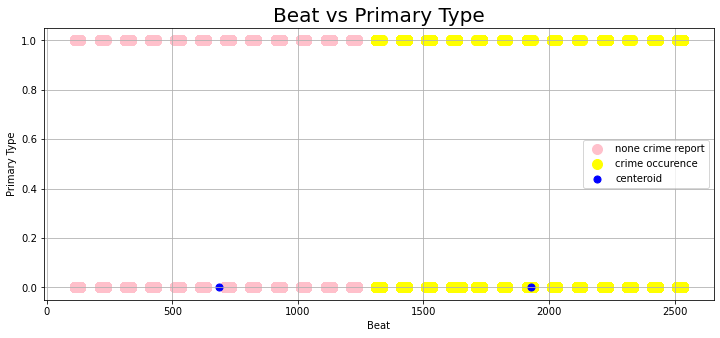

In [14]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Beat vs Primary Type', fontsize = 20)
plt.grid()
plt.xlabel('Beat')
plt.ylabel('Primary Type')
plt.legend()
plt.show()

In [ ]:
We can infer from the preceding cluster, that there was crime report more in 1900 Police geographical area in average.

## Performing K-means Clustering for Community area versus Primary Type_ARSON

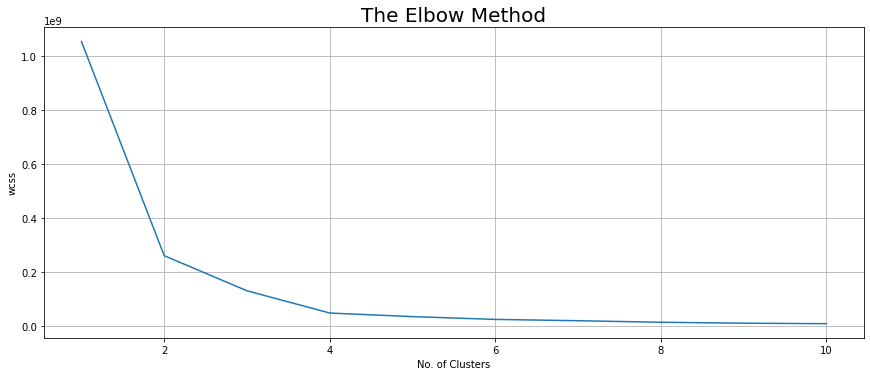

In [15]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [11, 27]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [16]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
Plot the scatter plot between Community Area and Primary Type.

We assign the color pink for none crime report,yellow for crime occurence and blue for the centroid of the cluster:

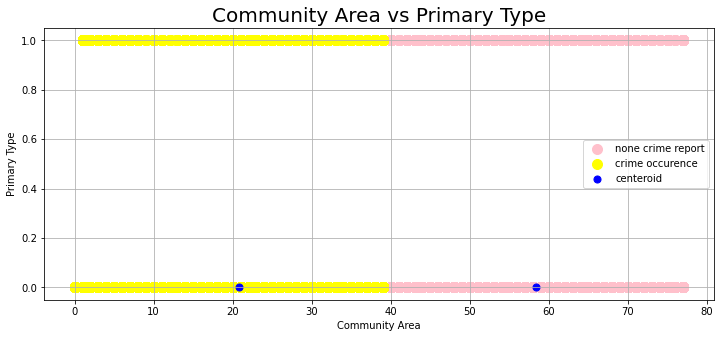

In [17]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Community Area vs Primary Type_ARSON', fontsize = 20)
plt.grid()
plt.xlabel('Community Area')
plt.ylabel('Primary Type_ARSON')
plt.legend()
plt.show()

In [ ]:
The preceding cluster above infers that the community area that had average crime report is 22

## Performing K-means Clustering for Ward versus Primary Type¶ 

To verify the crime pattern in the Ward

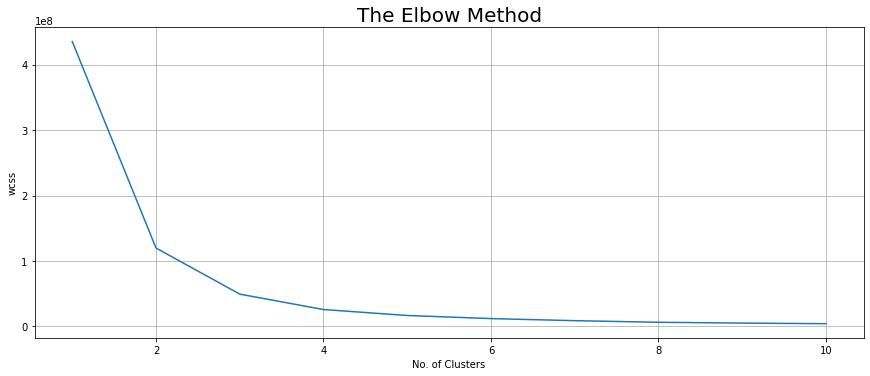

In [19]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [10, 27]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [20]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
Plot the scatter plot between Ward and Primary Type.

We assign the color pink for none crime report,yellow for crime occurence and blue for the centroid of the cluster:

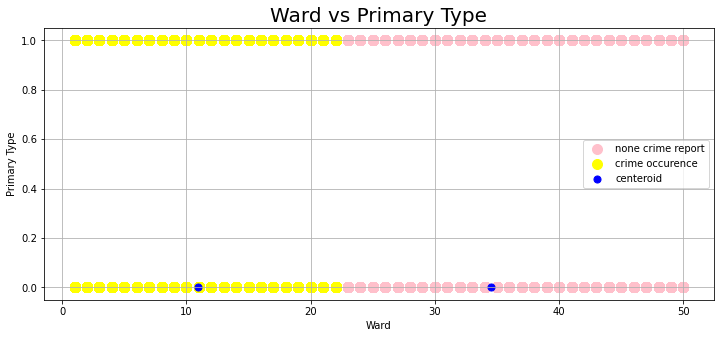

In [21]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Ward vs Primary Type', fontsize = 20)
plt.grid()
plt.xlabel('Ward')
plt.ylabel('Primary Type')
plt.legend()
plt.show()

In [ ]:
We can infer from the cluster that there was more crime incidence in ward 34

# Performing K-means Clustering for Year versus Arrest
To verify the year which had more Arrest

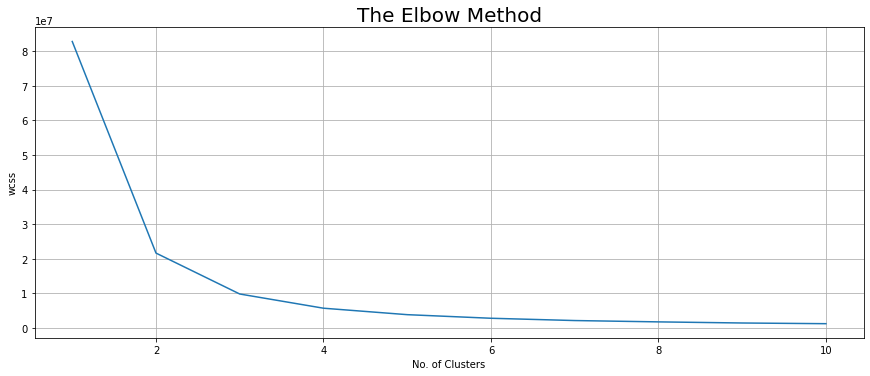

In [13]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [15, 21]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

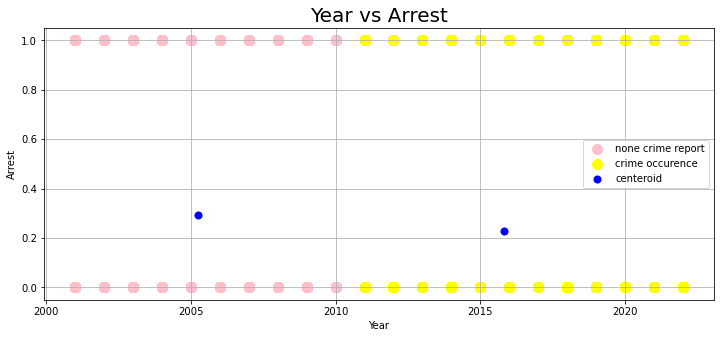

In [15]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Year vs Arrest', fontsize = 20)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Arrest')
plt.legend()
plt.show()

In [ ]:
The preceding cluster infers that 2016 had more crime incidence and arrests.

In [ ]:
Summary 
Inferences from the preceding clusters gives the following insight;
Year 2016 has a good number of arrests more than other years, it shows that crime incidence in year 2016 was 
higher than the other years. Beat number 1900 geographical area recorded in average more crime incidence.
At the District; out of the 22 police districts, district 19 recorded in average more crime incidence.
At the Ward, we can see that ward 34 recorded in average more crime incidence than the other wards.
Community area - 22 out of the 77 areas had in average more recorded crime incidence.

Recommendation/advise to Chicago Police Department to crime patterns and where they are likely to occur;
In regards to the provided crime dataset and inferences from the clusters we can say that the crime primary 
descriptions - BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,
CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING, HOMICIDE,HUMAN TRAFFICKING,
INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,
NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC 
VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,
THEFT,WEAPONS VIOLATION. These crime incidences are likely to occur at the BEAT number 1900 under DISTRICT number 19 at
WARD 34 and Community Area 22.

In order to prevent or reduce crime incidences to the above locations, we will suggest that a more detailed 
police investigation should be carried out on the factors that gave rise to crime and Arrests recorded in Year 2016.
This information will provide adequate intelligence to prevent further crime occurence especially on the above stated
locations.

# To help Police Department determine what type of crimes to prepare for.
we will use k-means clustering algorithm to gather insights

# K-means Clustering for Arrest versus Primary Type_PUBLIC PEACE VIOLATION

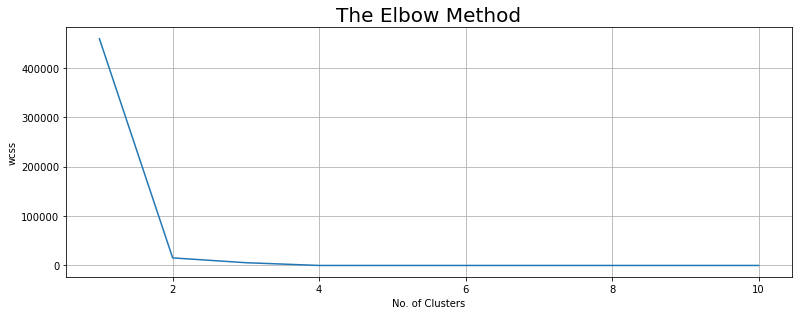

In [19]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [24, 55]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [17]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

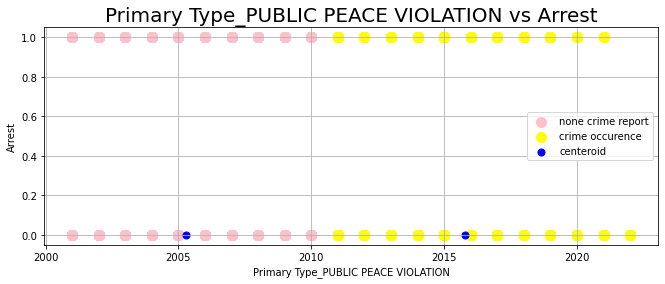

In [23]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_PUBLIC PEACE VIOLATION vs Arrest', fontsize = 20)
plt.grid()
plt.xlabel('Primary Type_PUBLIC PEACE VIOLATION')
plt.ylabel('Arrest')
plt.legend()
plt.show()

In [ ]:
The preceding cluster infers that a good number of arrest was on weapon violation. 

## K-means Clustering for Arrest versus Primary Type_WEAPONS VIOLATION

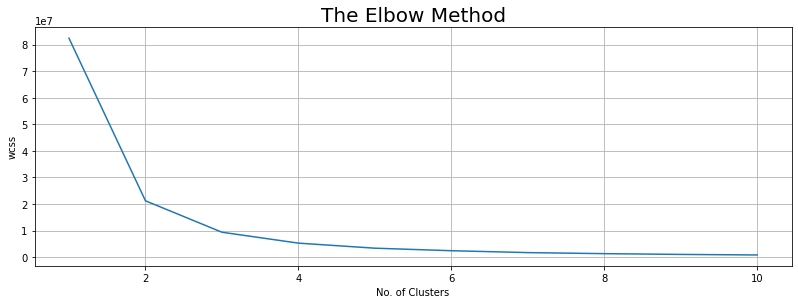

In [14]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [15, 61]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

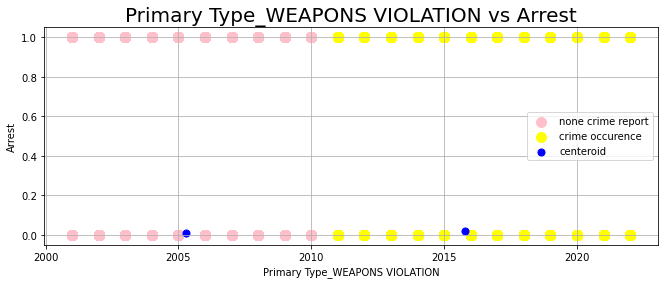

In [16]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_WEAPONS VIOLATION vs Arrest', fontsize = 20)
plt.grid()
plt.xlabel('Primary Type_WEAPONS VIOLATION')
plt.ylabel('Arrest')
plt.legend()
plt.show()

In [ ]:
The cluster infers that most of the Arrest on Weapons Violation is in 2016

# K-means Clustering for Year versus Primary Type_WEAPONS VIOLATION

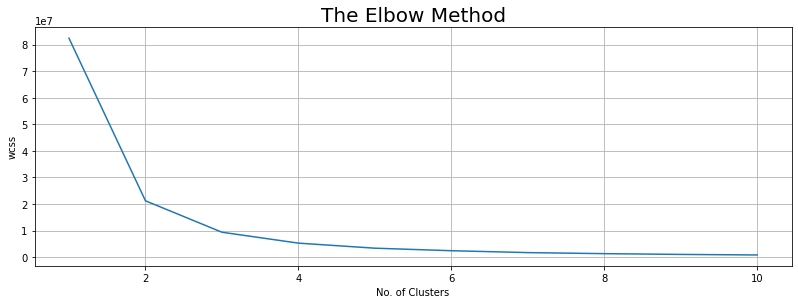

In [11]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [15, 61]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

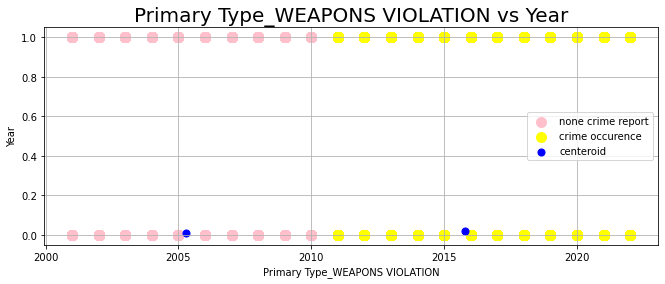

In [13]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_WEAPONS VIOLATION vs Year', fontsize = 20)
plt.grid()
plt.xlabel('Primary Type_WEAPONS VIOLATION')
plt.ylabel('Year')
plt.legend()
plt.show()

In [ ]:
The cluster shows that crime incidence on weapons violation was recorded more in 2016.

# K-means Clustering for Year versus Primary Type_GAMBLING

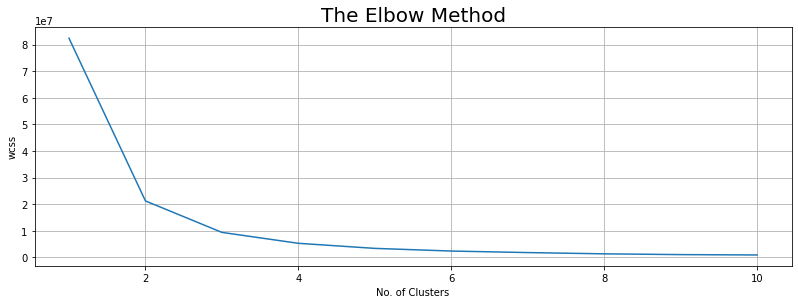

In [20]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [15, 37]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

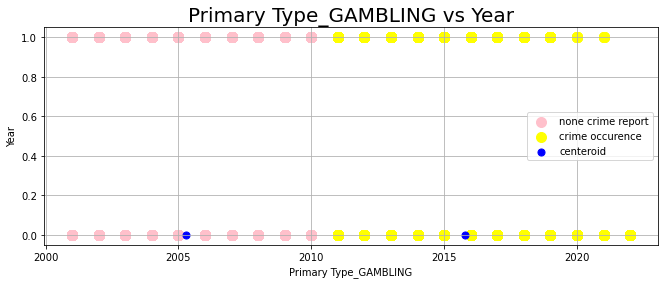

In [22]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_GAMBLING vs Year', fontsize = 20)
plt.grid()
plt.xlabel('Primary Type_GAMBLING')
plt.ylabel('Year')
plt.legend()
plt.show()

In [ ]:
The cluster infers that Gambling as a crime primary type occurred more in 2016.

# K-means Clustering for District versus Primary Type_GAMBLING

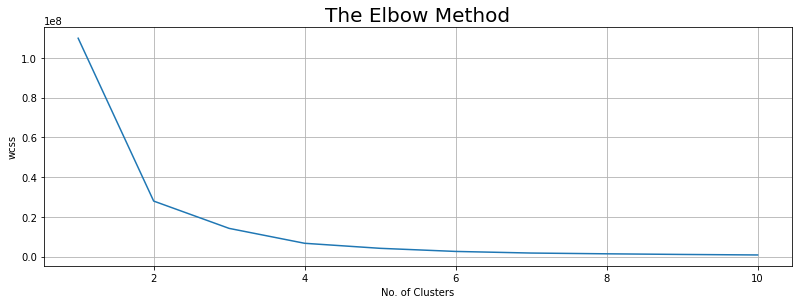

In [10]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 37]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

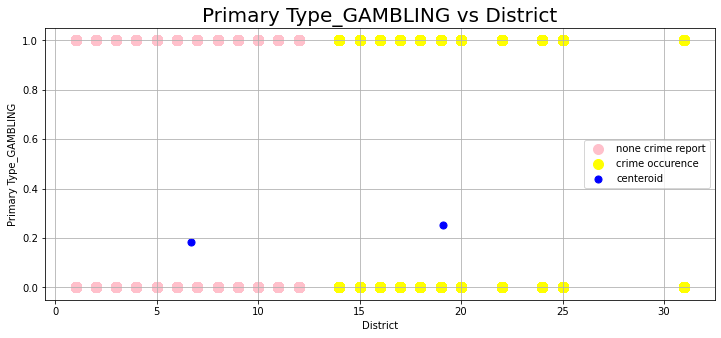

In [16]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_GAMBLING vs District', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_GAMBLING')
plt.legend()
plt.show()

In [ ]:
The Cluster infers that Gambling occurred in District 19

# K-means Clustering for District versus Primary Type_PROSTITUTION

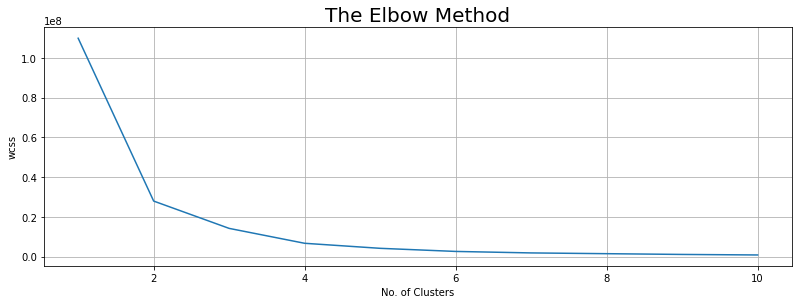

In [17]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 53]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

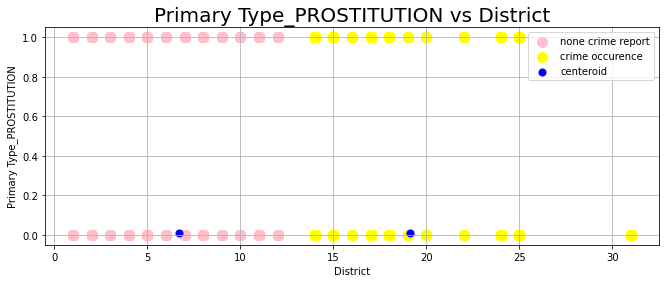

In [19]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_PROSTITUTION vs District', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_PROSTITUTION')
plt.legend()
plt.show()

In [ ]:
Crime incidence of Prostitution occurred in District 19

# K-means Clustering for Community area versus Primary Type_OBSCENITY

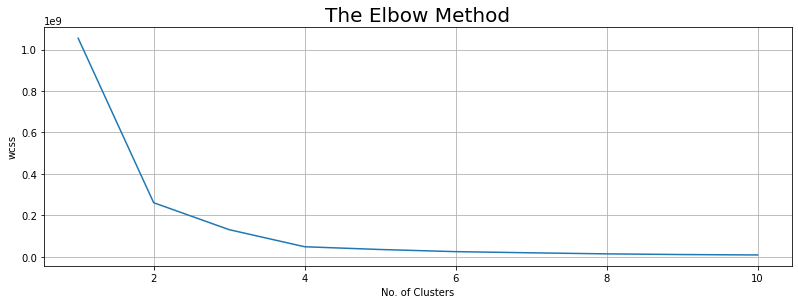

In [20]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [11, 49]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

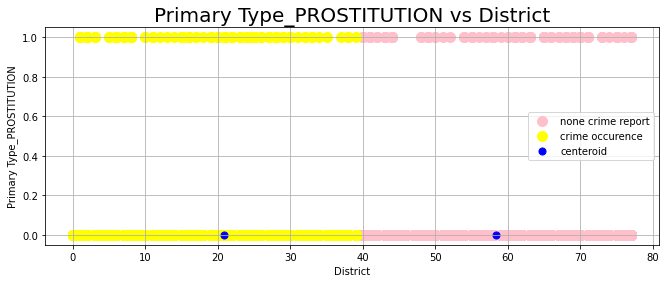

In [22]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_PROSTITUTION vs District', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_PROSTITUTION')
plt.legend()
plt.show()

In [ ]:
We can see that Prostitution crime incidence was reported in District 21

# K-means Clustering for Community area versus Primary Type_PROSTITUTION

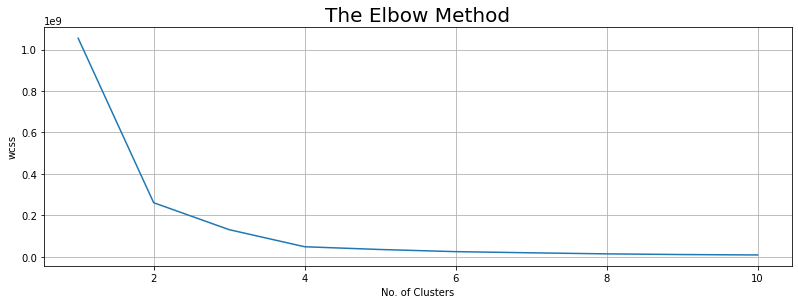

In [23]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [11, 49]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [25]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

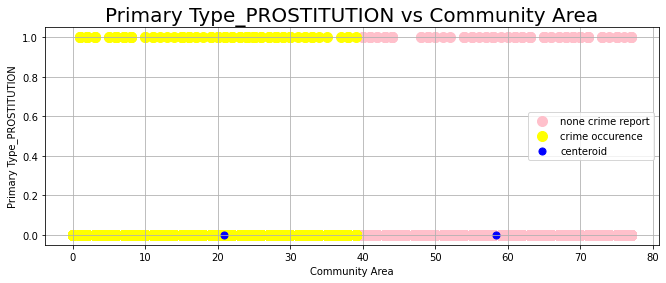

In [26]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_PROSTITUTION vs Community Area', fontsize = 20)
plt.grid()
plt.xlabel('Community Area')
plt.ylabel('Primary Type_PROSTITUTION')
plt.legend()
plt.show()

In [ ]:
The cluster infers that Prostitution was reported in Community Area-21

# K-means Clustering for Ward versus Primary Type_PROSTITUTION

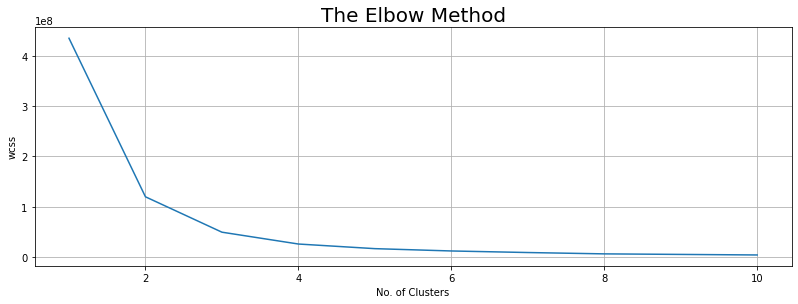

In [27]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [10, 49]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

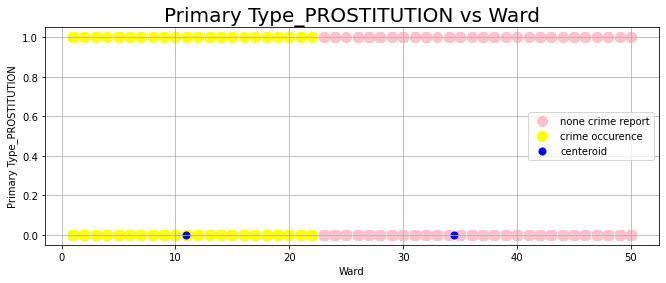

In [29]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_PROSTITUTION vs Ward', fontsize = 20)
plt.grid()
plt.xlabel('Ward')
plt.ylabel('Primary Type_PROSTITUTION')
plt.legend()
plt.show()

In [ ]:
The cluster infers Prostitution was reported in Ward 11

# K-means Clustering for Beat versus Primary Type_PROSTITUTION

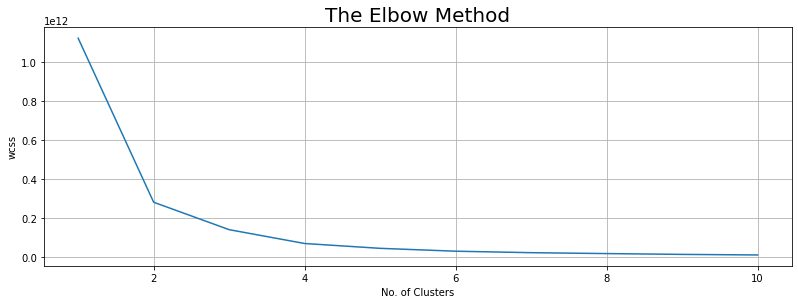

In [30]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [8, 49]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

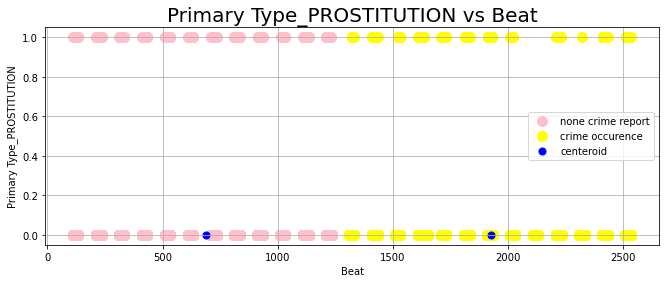

In [31]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_PROSTITUTION vs Beat', fontsize = 20)
plt.grid()
plt.xlabel('Beat')
plt.ylabel('Primary Type_PROSTITUTION')
plt.legend()
plt.show()

In [ ]:
The cluster infers that crime incidence of Prostitution was recorded on Beat 1900

# K-means Clustering for District versus Primary Type_NARCOTICS

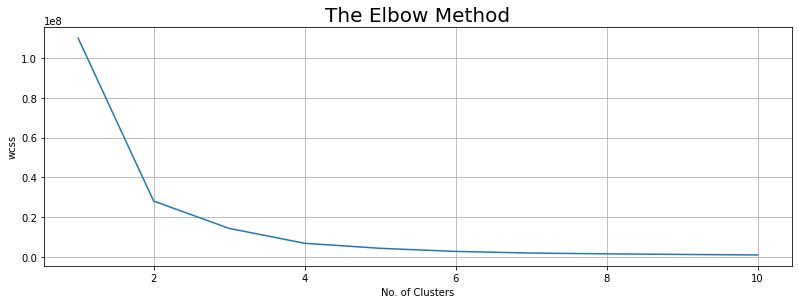

In [32]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 45]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

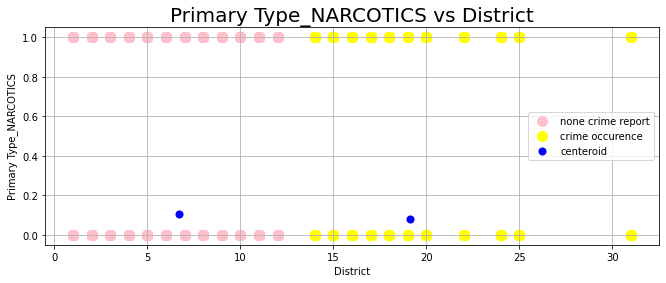

In [33]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_NARCOTICS vs District', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_NARCOTICS')
plt.legend()
plt.show()

In [ ]:
We can see from the cluster, that Narcotics crime incidence was more in District 19.

# K-means Clustering for District versus Primary Type_KIDNAPPING

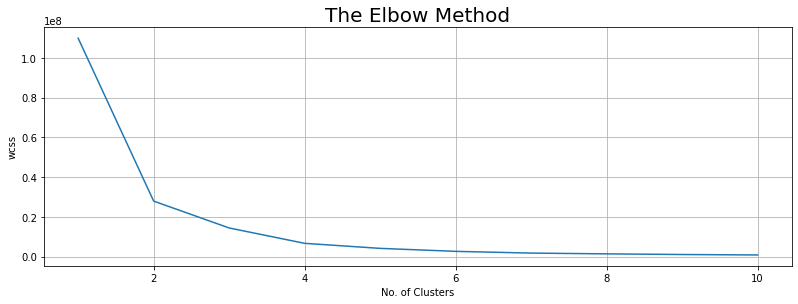

In [34]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 42]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

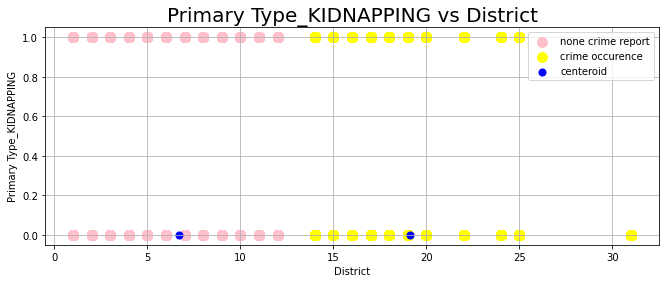

In [36]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_KIDNAPPING vs District', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_KIDNAPPING')
plt.legend()
plt.show()

In [ ]:
We can infer from the cluster that Kidnapping crime incidence was more in District 19 in average.

# K-means Clustering for District versus Primary Type_HUMAN TRAFFICKING

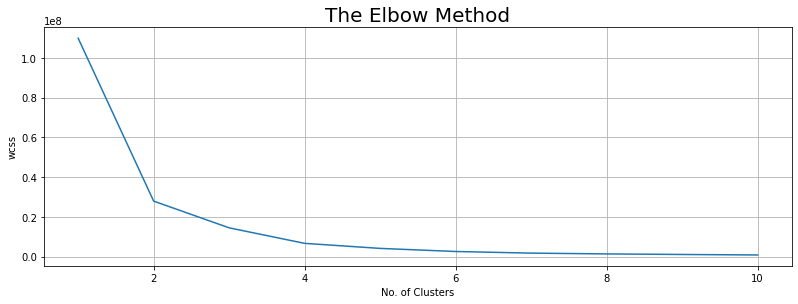

In [37]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 39]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

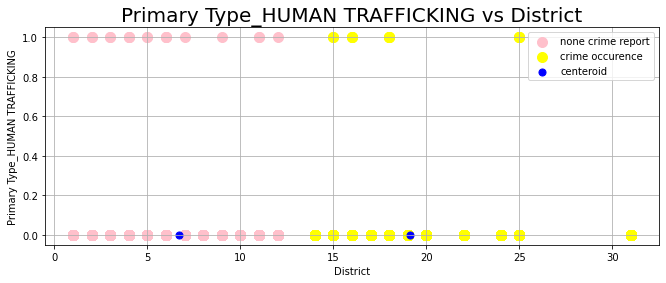

In [38]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_HUMAN TRAFFICKING vs District', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_HUMAN TRAFFICKING')
plt.legend()
plt.show()

In [ ]:
From the cluster, we can infer that Human Trafficking was more in DIstrict 19.

## K-means Clustering for District versus Primary Type_CRIMINAL DAMAGE

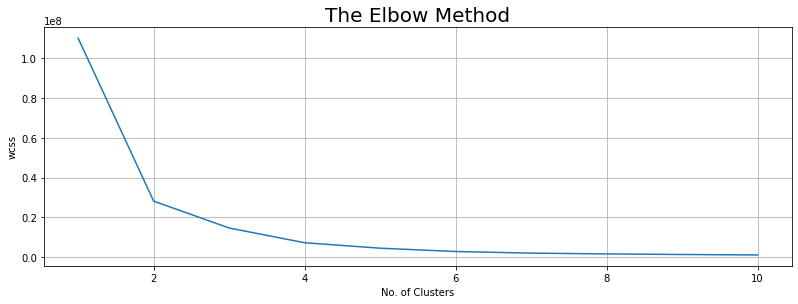

In [11]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [9, 33]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

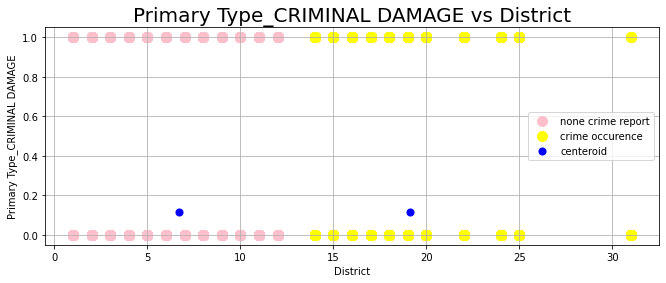

In [12]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Primary Type_CRIMINAL DAMAGE vs District', fontsize = 20)
plt.grid()
plt.xlabel('District')
plt.ylabel('Primary Type_CRIMINAL DAMAGE')
plt.legend()
plt.show()

In [ ]:
From the preceding cluster, criminal damage crime incidence was recorded in District 19. 

# To uncover the Days of the Week and Periods to expect these crimes

In [17]:
# we get unique values of Days of the week
dfSub_day = dfSub["day"].unique()
dfSub_day

array(['Sat ', 'Fri ', 'Wed ', 'Mon ', 'Tue ', 'Sun ', 'Thu '],
      dtype=object)

In [14]:
# Inorder to uncover insights to the days of the week,
# We convert day from categorical to numerical data
# Using Dummy Variable Encoding 
day_encode = dfSub.copy()
day_encoded = pd.get_dummies(day_encode, columns=['day'], prefix=['day'])
dfSub = day_encoded.copy()


In [20]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275848 entries, 1832276 to 1378888
Data columns (total 68 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   Unnamed: 0                                      int64  
 1   ID                                              int64  
 2   Case Number                                     object 
 3   Date                                            object 
 4   Block                                           object 
 5   IUCR                                            object 
 6   Description                                     object 
 7   Location Description                            object 
 8   Beat                                            int64  
 9   District                                        float64
 10  Ward                                            float64
 11  Community Area                                  float64
 12  FBI Code              

## K-means Clustering for ID versus day_Fri 

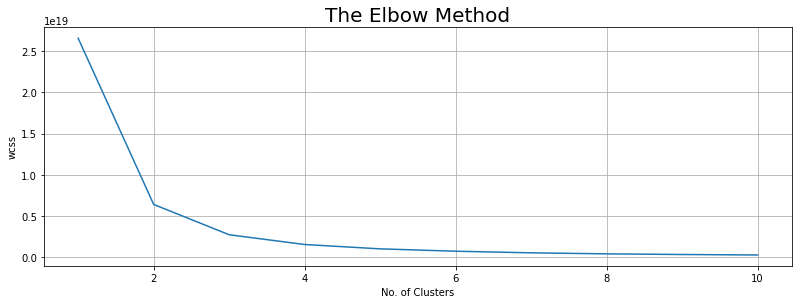

In [22]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [1, 61]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

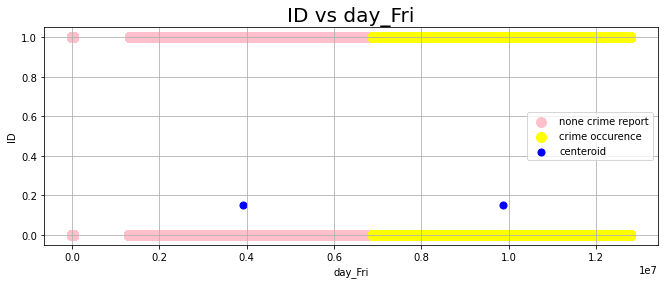

In [23]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('ID vs day_Fri', fontsize = 20)
plt.grid()
plt.xlabel('day_Fri')
plt.ylabel('ID')
plt.legend()
plt.show()

In [ ]:
From the cluster, we can infer Friday had 9000000 recorded crime incidents in average

## K-means Clustering for ID versus day_Mon

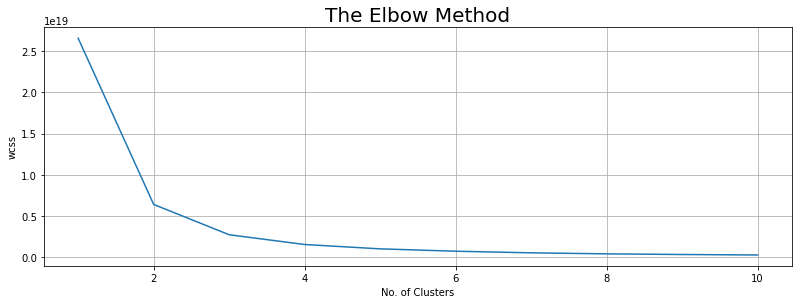

In [24]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [1, 62]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

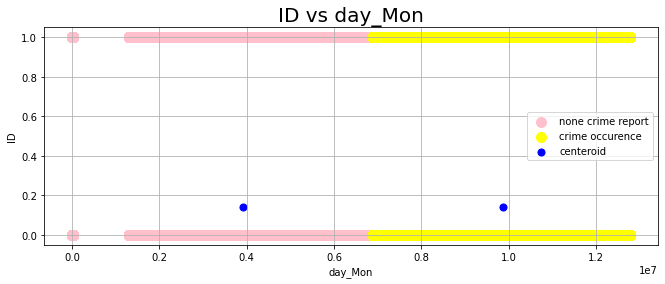

In [25]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('ID vs day_Mon', fontsize = 20)
plt.grid()
plt.xlabel('day_Mon')
plt.ylabel('ID')
plt.legend()
plt.show()

In [ ]:
From the cluster, we can infer Monday had 9000000 recorded crime incidents in average

## K-means Clustering for ID versus day_Sat

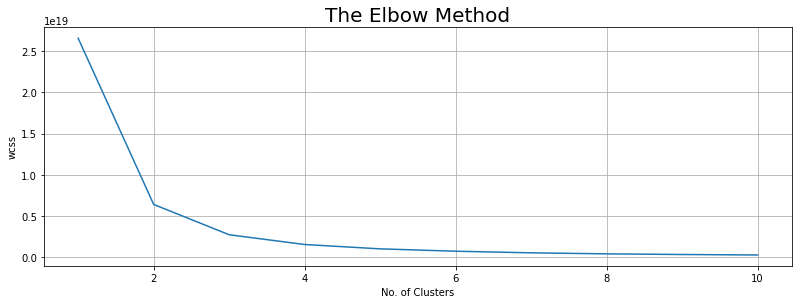

In [26]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [1, 63]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

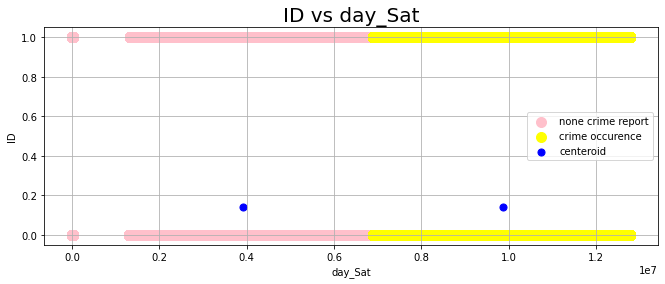

In [27]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('ID vs day_Sat', fontsize = 20)
plt.grid()
plt.xlabel('day_Sat')
plt.ylabel('ID')
plt.legend()
plt.show()

In [ ]:
From the cluster, we can infer Saturday had 9000000 recorded crime incidents in average

## K-means Clustering for ID versus day_Sun

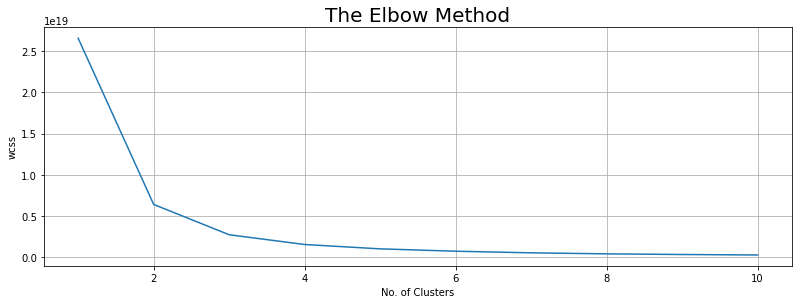

In [28]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [1, 64]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

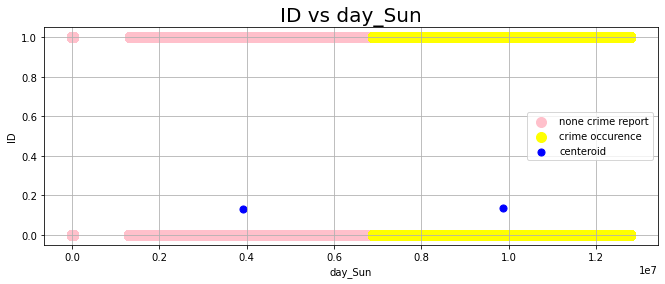

In [29]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('ID vs day_Sun', fontsize = 20)
plt.grid()
plt.xlabel('day_Sun')
plt.ylabel('ID')
plt.legend()
plt.show()

In [ ]:
From the cluster, we can infer Sunday had 9000000 recorded crime incidents in average

## K-means Clustering for ID versus day_Thu

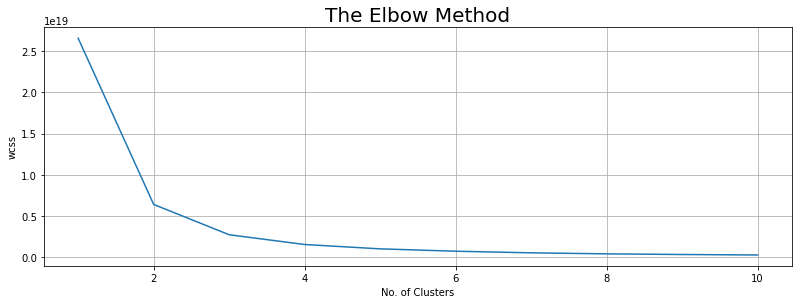

In [32]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [1, 65]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

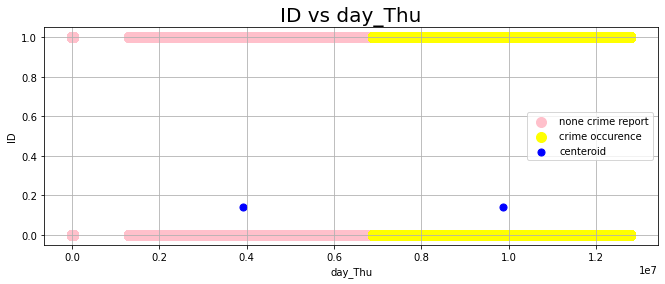

In [33]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('ID vs day_Thu', fontsize = 20)
plt.grid()
plt.xlabel('day_Thu')
plt.ylabel('ID')
plt.legend()
plt.show()

In [ ]:
From the cluster, we can infer Thursday had 9000000 recorded crime incidents in average

## K-means Clustering for ID versus day_Wed


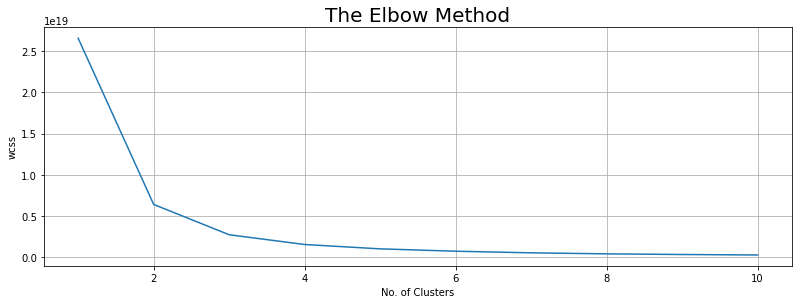

In [30]:
#1. Select the columns and assign them to a variable called x:
    
x = dfSub.iloc[:, [1, 67]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
#3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

#4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (11, 4)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

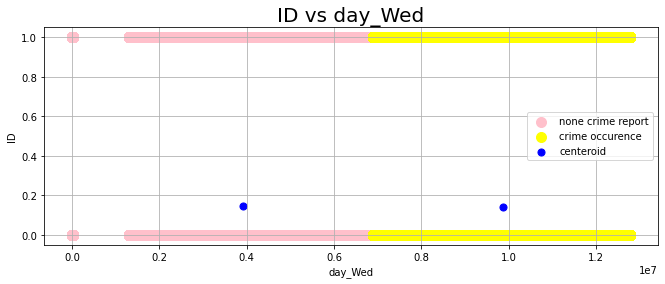

In [31]:
#From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'none crime report')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'crime occurence')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('ID vs day_Wed', fontsize = 20)
plt.grid()
plt.xlabel('day_Wed')
plt.ylabel('ID')
plt.legend()
plt.show()

In [ ]:
From the cluster, we can infer Wednesday had 9000000 recorded crime incidents in average

In [ ]:
In summary we can see that about 9000000 incidents in average were recorded across the days of the week.
The Police department should expect crime at all the days of week

In [15]:
# Run profile report
profile = dfSub.profile_report(title='Pandas Profiling Report') 

In [ ]:
# Saving report as html file
profile.to_file(output_file="C://Users/MY COMPUTER/Documents/OneCampus files/Final Project/output.html" )

In [17]:
# Saving report as html file
profile.to_file(output_file="C://Users/MY COMPUTER/Documents/OneCampus files/Final Project/output.html" )

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\MY COMPUTER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-d65c9d595803>", line 2, in <module>
    profile.to_file(output_file="C://Users/MY COMPUTER/Documents/OneCampus files/Final Project/output.html" )
  File "C:\Users\MY COMPUTER\anaconda3\lib\site-packages\pandas_profiling\profile_report.py", line 257, in to_file
    data = self.to_html()
  File "C:\Users\MY COMPUTER\anaconda3\lib\site-packages\pandas_profiling\profile_report.py", line 368, in to_html
    return self.html
  File "C:\Users\MY COMPUTER\anaconda3\lib\site-packages\pandas_profiling\profile_report.py", line 185, in html
    self._html = self._render_html()
  File "C:\Users\MY COMPUTER\anaconda3\lib\site-packages\pandas_profiling\profile_report.py", line 287, in _render_html
    report = self.report
  File "C:\Users\MY COMPUTER\anaconda3\lib\site-packa

TypeError: object of type 'NoneType' has no len()

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
Due to constraints on system resources, some explorations were not performed.